<a href="https://colab.research.google.com/github/turgonboyev/Google_Colab_uchun/blob/main/HR_tahlil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  XYZ kompaniyasi taxminan 4000 ishchi xodim ishlaydi va afsuski har yili xodimlarning 15% ga yaqini o'z xohishlari bilan yoki kompaniya tomonidan ishdan bo'shatiladi va yana yangi xodim ishga olinadi. Bu esa kompaniya uchun bir qancha noqulayliklar tug'diradi (loyihalar sekinlashishi, ishga qabul qilish jarayoni uzoqligi, yangi ishchi ko'nikishi uchun treninglar va ma'lum vaqt kerakligi). Ishchilarni saqlab qolish uchun kompaniya HR tahlil qilib ko'rishga qaror qildi va quyidagi datasetdan foydalanib, qanday faktorlar ishchilarni bo'shashiga sabab bo'lishini tahlil qilishgan. 
  
  Dataset ustun nomlari:

    Age - yoshi

    Attrition - ishdan bo'shaganmi

    BusinessTravel - komandirovka

    DistanceFromHome - uydan ishgacha bo'lgan masofa (km)

    Education - Ta'lim

    Gender - jinsi
    
    MaritalStatus - oilaviy holati

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#@title QUYIDAGI KODGA TEGMANG!!! 
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

- va ma'lumotlarni "data" nomli o'zgaruvchiga biriktirib olamiz
- hamda 'EmployeeCount','EmployeeID','StandardHours' ustunlari ortiqchaligi sababli o'chirib tashlaymiz

LINK: https://raw.githubusercontent.com/mukhammad-irmatov/health_dataset/main/hr_dataset.csv

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/botir0701/Datasets/main/HR_datasets.csv')
data.columns

Index(['Unnamed: 0', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
data.drop(['EmployeeCount','EmployeeID','StandardHours', 'Unnamed: 0'], axis=1, inplace=True)
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,131160,1.0,Y,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,41890,0.0,Y,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,193280,1.0,Y,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,83210,3.0,Y,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,23420,4.0,Y,12,2,9.0,2,6,0,4


In [ ]:
#Har bir ustundagi nullar sonini topamiz
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [ ]:
#null qiymatlarga 0 qo'yib chiqamiz
data.fillna(0, inplace=True)
df = data.copy()
data.isnull().sum()
data.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,131160,1.0,Y,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,41890,0.0,Y,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,193280,1.0,Y,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,83210,3.0,Y,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,23420,4.0,Y,12,2,9.0,2,6,0,4


In [ ]:
data.corr

<bound method DataFrame.corr of       Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  Gender  JobLevel  \
0                    6          2  Life Sciences  Female         1   
1                   10          1  

ValueError: ignored

<Figure size 1152x720 with 0 Axes>

In [ ]:
l = len(df)
no = df[df['Attrition'] == 'No']
yes = df[df['Attrition'] == 'Yes']
print(f"Jami ishchilar soni {l} \n Ishdan bo'shaganlari soni {len(yes)} \n Hozir ham ishlayotganlari soni {len(no)} \n Ishdan bo'shaganlar foizda {len(yes)/l * 100} \n Ishdan qolganlar foizda {len(no)/l * 100}")


Jami ishchilar soni 4410 
 Ishdan bo'shaganlari soni 711 
 Hozir ham ishlayotganlari soni 3699 
 Ishdan bo'shaganlar foizda 16.122448979591837 
 Ishdan qolganlar foizda 83.87755102040816


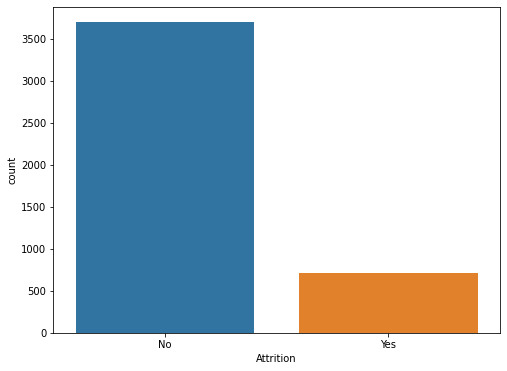

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x = 'Attrition', data=df)

plt.show()

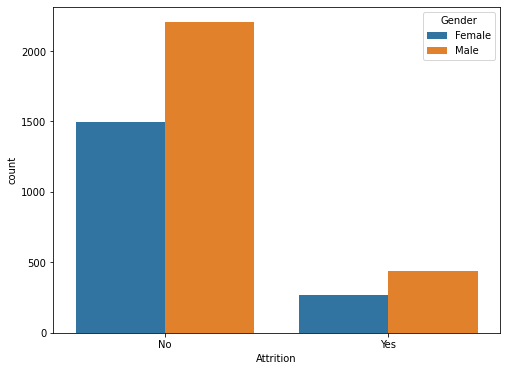

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x = 'Attrition',hue='Gender', data=df)

plt.show()

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

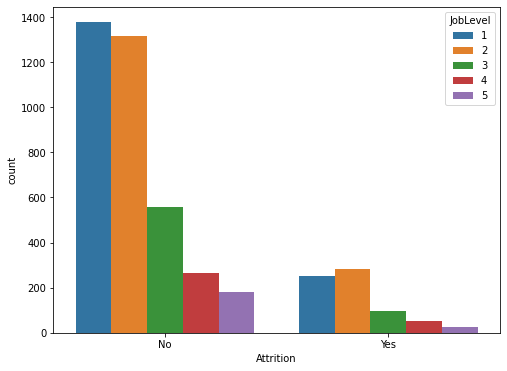

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x = 'Attrition',hue='JobLevel', data=df)

plt.show()

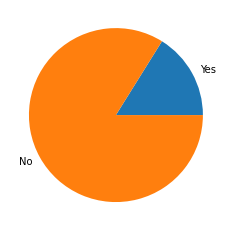

In [ ]:
yes_or_no = ['Yes', 'No']

value = [len(yes), len(no)]

plt.pie(value, labels=yes_or_no)

plt.show()

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df['Department'].value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

In [ ]:
yangi = pd.crosstab(df.index, [ df['Department'], df['Attrition']], rownames=['Index'], colnames=[ 'Department', 'Attrition'])

yangi.head()

Department Human Resources     Research & Development     Sales    
Attrition               No Yes                     No Yes    No Yes
Index                                                              
0                        0   0                      0   0     1   0
1                        0   0                      0   1     0   0
2                        0   0                      1   0     0   0
3                        0   0                      1   0     0   0
4                        0   0                      1   0     0   0

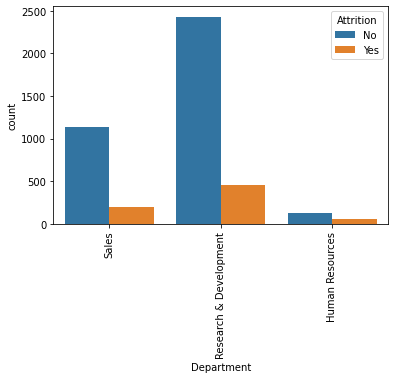

In [42]:
sns.countplot(x='Department', hue='Attrition', data=data)
plt.xticks(rotation=90)
plt.show()

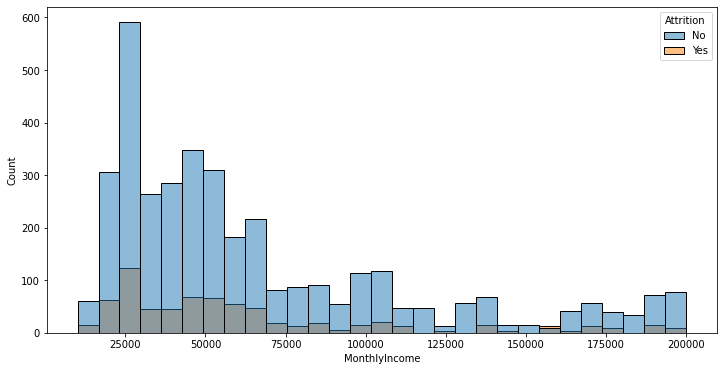

In [44]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='MonthlyIncome', hue='Attrition')

plt.show()